In [ ]:
import numpy as np

In [ ]:
class LogisticRegressionGD(object):
  def __init_(self, eta=0.05, n_iter=100, random_state=1):
    self.eta = eta
    self.n_iter=n_iter
    self.random_state = random_state

  def fit(self, X, y):

    rgen = np.random.RandomState(self.random_state)
    self.w_= rgen.normal(loc=0.0, scale = 0.01, size = 1 + X.shape[1])
    self.cost_ = []

    for i in range(self.n_iter):
      net_input = self.net_input(X)
      output = self.activation(net_input)
      errors = (y-output)
      self.w_[1:] += self.eta*X.T.dot(errors)
      self.w_[0] += self.eta * errors.sum()

      cost = (-y.dot(np.log(output))) - ((1-y).dot(np.log(1-output)))
      self.cost_.append(cost)
    return self

  def net_input(self, X):
    return np.dot(X, self.w_[1:]) + self.w_[0]

  def activation(self, z):
    return 1. / (1. + np.exp(-np.clip(z, -250, 250)))
  
  def predict(self, X):
    return np.where(self.net_input(X) >= 0.0, 1, 0)

In [ ]:
## 사이킷런을 사용하여 로지스틱 회귀 모델 훈련

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=100.0, random_state=1)

In [ ]:
lr.fit(X_train_std, y_train)

NameError: ignored

In [ ]:
#예측 확률이 가장 높은 클래스 산출출
lr.predict_proba(X_test_std[:3, :]).argmax(axis=1)

#prdict 함수를 사용하면 더 쉬움
lr.predict(X_test_std[:3, :])



In [6]:
#### 이주의 필사 ####
from google.colab import drive
drive.mount('/content/drive')

# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#logistic regression
from sklearn.linear_model import LogisticRegression

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# data
train_df = pd.read_csv('/content/drive/MyDrive/MLDL스터디/study_mldl/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/MLDL스터디/study_mldl/test.csv')
combine = [train_df, test_df]

In [9]:
#데이터정보 확인
train_df.info()
print('-'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

In [10]:
# 데이터 기술통계 확인
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
# data split
X_train = train_df.drop('Survived', axis=1)
Y_train = train_df['Survived']
X_test = test_df.drop('PassengerId', axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape


((891, 11), (891,), (418, 10))

In [12]:
#logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train)*100, 2)
acc_log

ValueError: ignored

In [13]:
### 이주의 문제 ###

import pandas as pd
# 데이터 불러오기
fish = pd.read_csv('https://bit.ly/fish_csv_data')

In [15]:
# 데이터 preview
fish.info()
fish.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   159 non-null    object 
 1   Weight    159 non-null    float64
 2   Length    159 non-null    float64
 3   Diagonal  159 non-null    float64
 4   Height    159 non-null    float64
 5   Width     159 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.6+ KB


,Weight,Length,Diagonal,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,28.415723,31.227044,8.970994,4.417486
std,357.978317,10.716328,11.610246,4.286208,1.685804
min,0.000000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,63.400000,68.000000,18.957000,8.142000


In [16]:
### 훈련 데이터와 테스트 데이터 나누기
# 어떤 종의 생선이 있을까?
# hint : unique()
fish['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [17]:
#1. 타깃을 제외한 나머지 컬럼을 입력 데이터로 만든다.
# input 데이터 생성
# hint : to_numpy()사용
fish_input= fish.drop('Species',axis=1).to_numpy()

In [18]:
#2. 타깃 데이터를 출력 데이터로 만든다.
# output 데이터 생성
fish_output= fish['Species']

In [19]:
# 3. 훈련 데이터 (input data)와 테스트 데이터 (output data) 나누기 
from sklearn.model_selection import train_test_split
# random_state=42 지정한다

train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_output,random_state = 42)

In [20]:
### 훈련데이터와 테스트 데이터 세트를 표준화 전처리
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [21]:
### 확률적경사 하강법
from sklearn.linear_model import SGDClassifier

In [24]:
# 사이킷런 1.1.0 버전 이하일 경우 'log_loss'를 'log'로 바꾸어 주세요.
# Q1. 로지스틱 손실 함수 지정
# Q2. 에포크 횟수 10회 지정
# random_state=42로 지정한다
sc = SGDClassifier(loss='log', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [25]:
# 1. 10회의 결과값이 별로 좋지 않습니다. 더 훈련 시켜볼까요?
#code here(train_scaled, train_target)

sc = SGDClassifier(loss='log', max_iter=30, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8403361344537815
0.8


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [26]:
###  에포크와 과대/과소적합
import numpy as np
sc = SGDClassifier(loss='log', random_state=42)

train_score = []
test_score = []

classes = np.unique(train_target)

In [28]:
#300번의 에포크 동안 훈련을 반복하여 진행해보기 
# * 반복마다 훈련 세트와 테스트 세트의 점수를 계산하여 train_score,test_score 리스트에 추가
for i in range(0,300):
  sc.partial_fit(train_scaled, train_target, classes= classes)
  train_score.append(sc.score(train_scaled, train_target))
  test_score.append(sc.score(test_scaled, test_target))

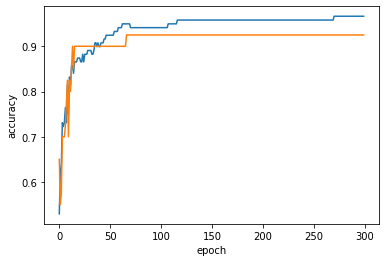

In [29]:
#시각화
import matplotlib.pyplot as plt

plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [30]:
##mission##
# SGDClassifier의 반복 횟수를 100에 맞추고 다시 훈련시키기
# 최종적으로 훈련 세트와 테스트 세트 점수 출력하기

for i in range(0,100):
  sc.partial_fit(train_scaled, train_target, classes= classes)
  train_score.append(sc.score(train_scaled, train_target))
  test_score.append(sc.score(test_scaled, test_target))

print(train_score[-1])
print(test_score[-1])

0.9663865546218487
0.925
